In [2]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import datetime
import pandas as pd
from collections import Counter
import math
import numpy as np

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
!wget https://raw.githubusercontent.com/apurvamulay/ReCOVery/master/dataset/recovery-news-data.csv

--2020-07-02 08:03:19--  https://raw.githubusercontent.com/apurvamulay/ReCOVery/master/dataset/recovery-news-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11337789 (11M) [text/plain]
Saving to: ‘recovery-news-data.csv.1’

recovery-news-data. 100%[===================>]  10.81M  24.7MB/s    in 0.4s    

2020-07-02 08:03:20 (24.7 MB/s) - ‘recovery-news-data.csv.1’ saved [11337789/11337789]



In [4]:
df = pd.read_csv("recovery-news-data.csv", parse_dates=[3], infer_datetime_format=True, encoding='utf-8')
reliable = df.loc[df['reliability'] == 1]
unreliable = df.loc[df['reliability'] == 0]
print(df.columns)
print(f"Reliable posts: {len(reliable)}\nUnreliable posts: {len(unreliable)}")

Index(['news_id', 'url', 'publisher', 'publish_date', 'author', 'title',
       'image', 'body_text', 'news_guard_score', 'mbfc_level',
       'political_bias', 'country', 'reliability'],
      dtype='object')
Reliable posts: 1364
Unreliable posts: 665


In [ ]:
def chunk_generator(doc: str, chunk_size: int):
    """
    Generates sentences such that total c
    """

In [10]:
def ngram_count(doc: str, ngram: int = 1, top_grams: int = None, blacklist_gram: list = []) -> Counter:
    """
    Ngram count of the document. Prints `top_grams` most frequent n-grams if not None.
    """
    nlp.max_length = max(1000000, len(doc))  # max_length > 1000000 is not safe when using NER or parser.
    doc = nlp(doc, disable=['ner', 'parser'])
    tokens = [token for token in doc if token.is_alpha and not token.is_stop]
    lemma_list = list()

    for i in range(len(tokens) - ngram):
        gram = list()
        for j in range(ngram):
            gram.append(tokens[i+j].lemma_.lower())
        
        if tuple(gram) not in blacklist_gram:
            lemma_list.append(tuple(gram))
    
    c = Counter(lemma_list)
    
    if top_grams:
        from pprint import pprint
        pprint(c.most_common(top_grams))
    
    nlp.max_length = 1000000  # setting it back to default.
    
    return c

In [6]:
def draw_wc_from_freq(freq: dict, plt, max_words:int = 1000, save:str = None):
    # boilerplate code for wordcliud generation
    wc = WordCloud(background_color="white", max_words=max_words)
    wc.generate_from_frequencies(freq)
    
    if save:
        wc.to_file(save)
    
    # show
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
#     plt.show()

In [11]:
def generate_ngram_wc(df: pd.core.frame.DataFrame, column: str, month: int, ngram: int, plt, save: str=None):
    """
    Generates wordcloud for either column `title` or column `body_text` for
    a particular month.
    """
    assert column == 'title' or column == 'body_text',"column must be either `title` or `body_text`"
    
    data = df.loc[df['publish_date'].map(lambda x: x.month) == month][column].values
    data = ' '.join(data)
    
    count = ngram_count(doc=data, ngram=ngram, blacklist_gram=[('getty', 'images'), ('et', 'link'), ('time', 'et')])
    
    count = dict(count)
    text_freq_dict = dict()
    for (k, v) in count.items():
        text_freq_dict[' '.join(k)] = v
    
    draw_wc_from_freq(text_freq_dict, plt=plt, save=save)

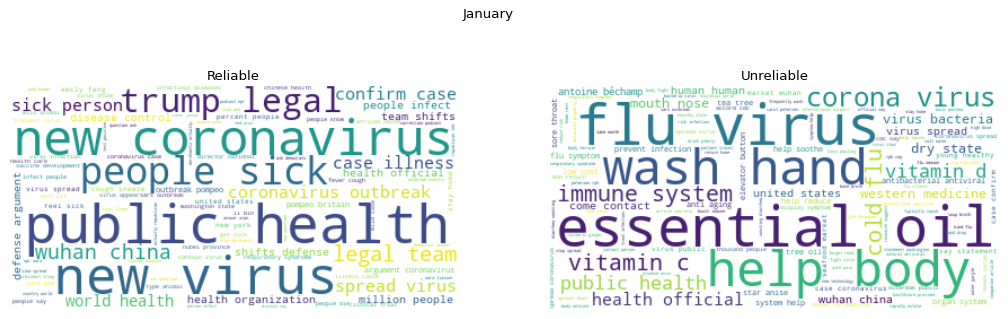

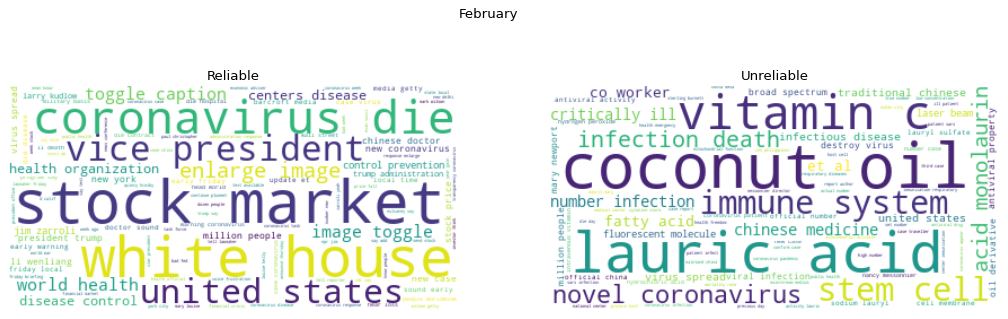

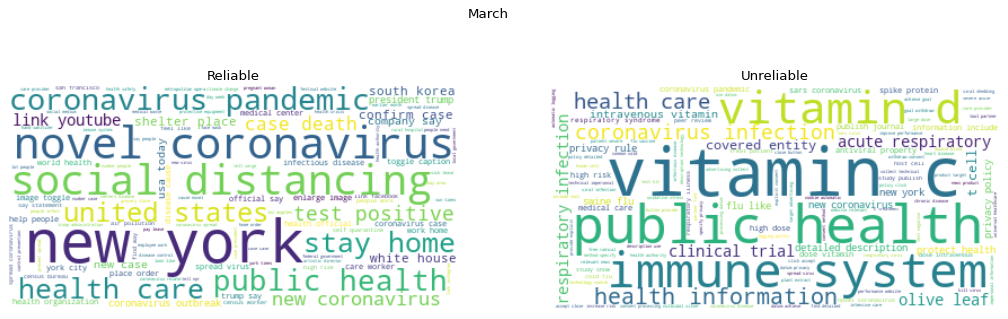

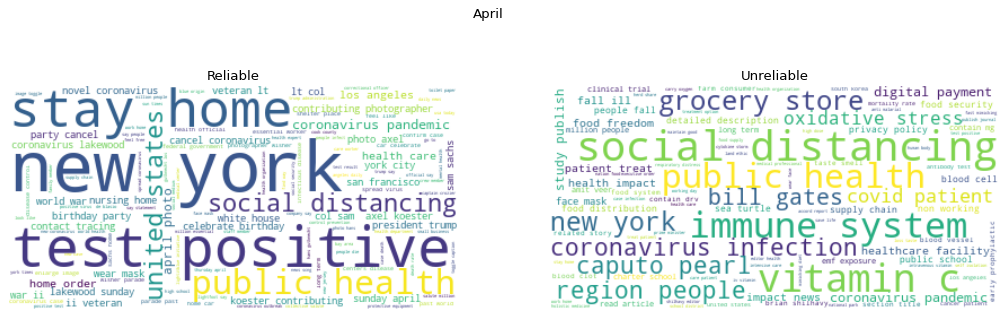

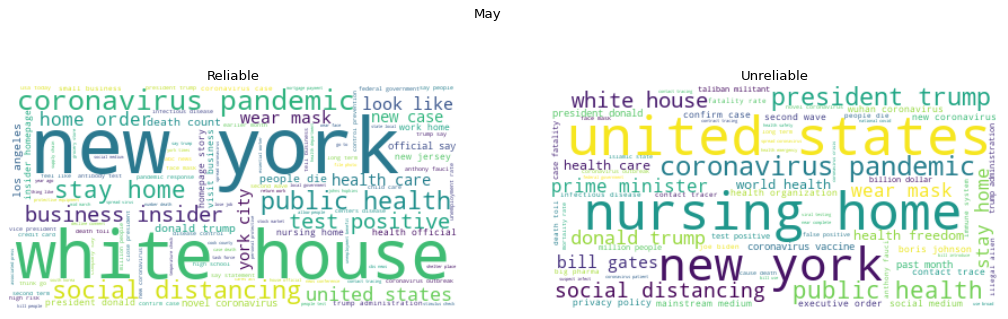

In [12]:
months = ['January', 'February', 'March', 'April', 'May']
for i in range(len(months)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), facecolor='w', dpi=80)
    fig.suptitle(months[i])
    ax1.title.set_text("Reliable")
    ax2.title.set_text("Unreliable")
    generate_ngram_wc(reliable, 'body_text', month=i+1, ngram=2, plt=ax1, save=f"{months[i]}_reliable_bigram.jpg")
    generate_ngram_wc(unreliable, 'body_text', month=i+1, ngram=2, plt=ax2, save=f"{months[i]}_unreliable_bigram.jpg")